In [40]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.datasets import load_breast_cancer

X, y = load_breast_cancer(as_frame=True, return_X_y=True)


In [41]:
df_full = pd.concat([X, y], axis=1)

In [42]:
df_full.shape

(569, 31)

In [57]:
df_full.target.value_counts()

target
1    357
0    212
Name: count, dtype: int64

In [43]:
# drop primeter and area features
df_full.drop(columns=['mean perimeter', 'mean area', 'worst perimeter', 'worst area', "area error", "perimeter error"], inplace=True)

In [44]:
df_full.target.value_counts()

target
1    357
0    212
Name: count, dtype: int64

In [45]:
df_full.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 25 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   mean radius              569 non-null    float64
 1   mean texture             569 non-null    float64
 2   mean smoothness          569 non-null    float64
 3   mean compactness         569 non-null    float64
 4   mean concavity           569 non-null    float64
 5   mean concave points      569 non-null    float64
 6   mean symmetry            569 non-null    float64
 7   mean fractal dimension   569 non-null    float64
 8   radius error             569 non-null    float64
 9   texture error            569 non-null    float64
 10  smoothness error         569 non-null    float64
 11  compactness error        569 non-null    float64
 12  concavity error          569 non-null    float64
 13  concave points error     569 non-null    float64
 14  symmetry error           5

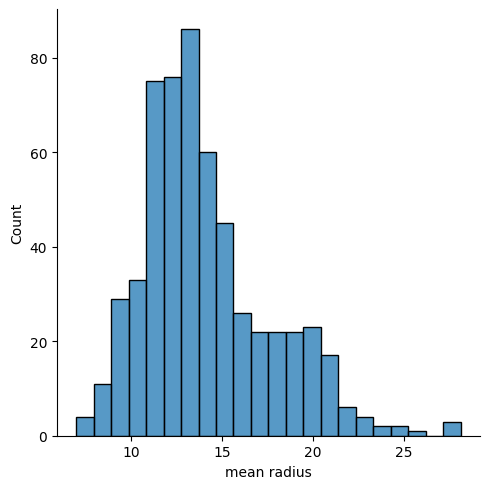

In [46]:
sns.displot(
    data=df_full,
    x='mean radius',
)

In [47]:
df = df_full.filter(regex='mean|target')

In [48]:
df

,mean radius,mean texture,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,target
0,17.99,10.38,0.11840,0.27760,0.30010,0.14710,0.2419,0.07871,0
1,20.57,17.77,0.08474,0.07864,0.08690,0.07017,0.1812,0.05667,0
2,19.69,21.25,0.10960,0.15990,0.19740,0.12790,0.2069,0.05999,0
3,11.42,20.38,0.14250,0.28390,0.24140,0.10520,0.2597,0.09744,0
4,20.29,14.34,0.10030,0.13280,0.19800,0.10430,0.1809,0.05883,0
...,...,...,...,...,...,...,...,...,...
564,21.56,22.39,0.11100,0.11590,0.24390,0.13890,0.1726,0.05623,0
565,20.13,28.25,0.09780,0.10340,0.14400,0.09791,0.1752,0.05533,0
566,16.60,28.08,0.08455,0.10230,0.09251,0.05302,0.1590,0.05648,0
567,20.60,29.33,0.11780,0.27700,0.35140,0.15200,0.2397,0.07016,0


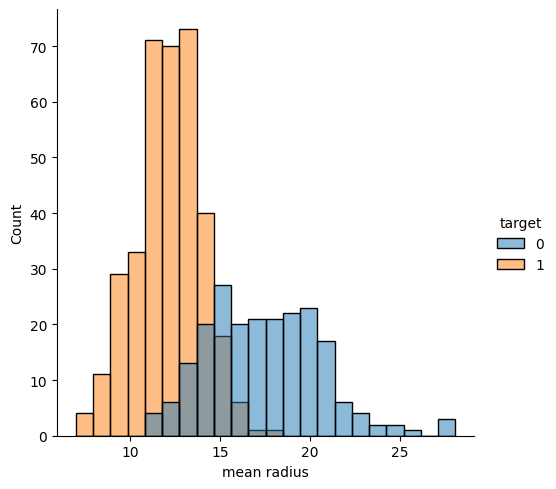

In [49]:
sns.displot(
    data=df,
    x='mean radius',
    hue='target',
)

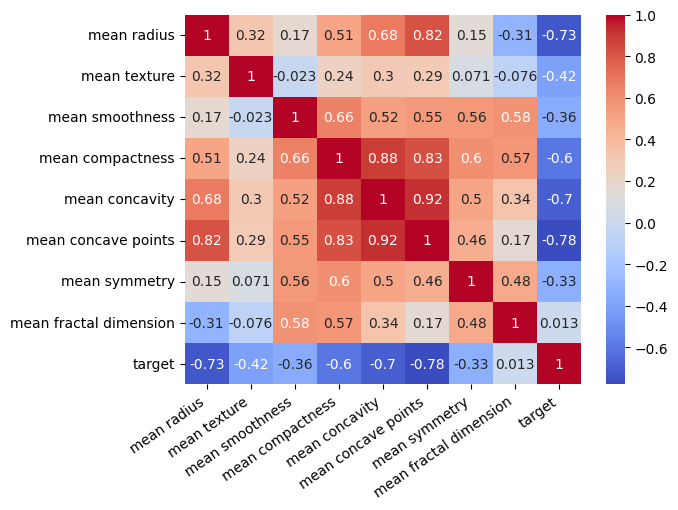

In [67]:
ax = sns.heatmap(
    df.corr(),
    annot=True,
    cmap='coolwarm',
)
ax.set_xticklabels(ax.get_xticklabels(), rotation=35, ha='right');

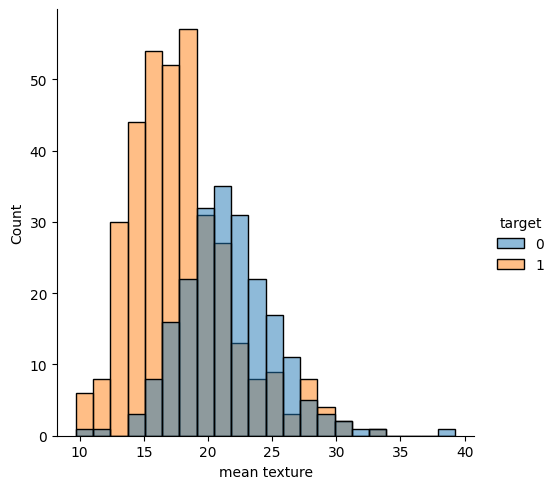

In [55]:
sns.displot(
    data=df,
    x='mean texture',
    hue='target',
)

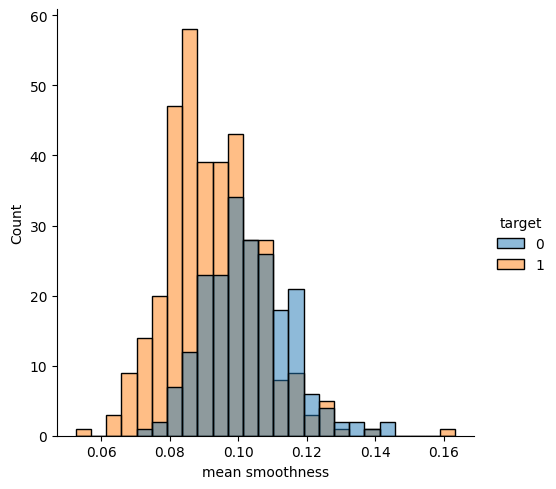

In [70]:
sns.displot(
    data=df,
    x='mean smoothness',
    hue='target',
)

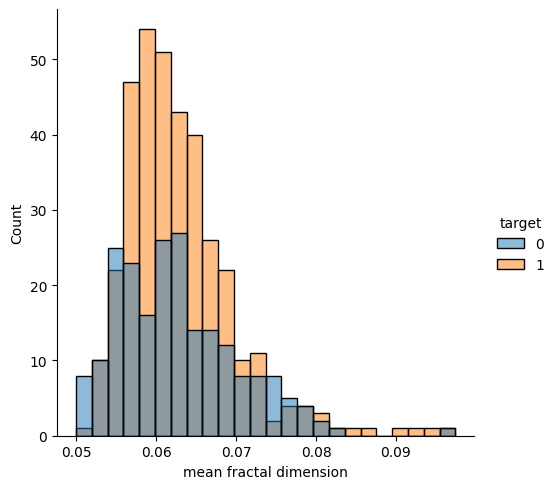

In [71]:
sns.displot(
    data=df,
    x='mean fractal dimension',
    hue='target',
)

<Axes: xlabel='mean fractal dimension', ylabel='target'>

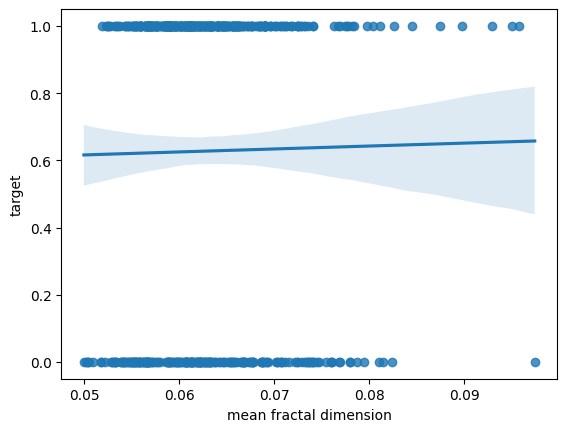

In [74]:
sns.regplot(
    data=df,
    x='mean fractal dimension',
    y='target',
    logistic=True,
)

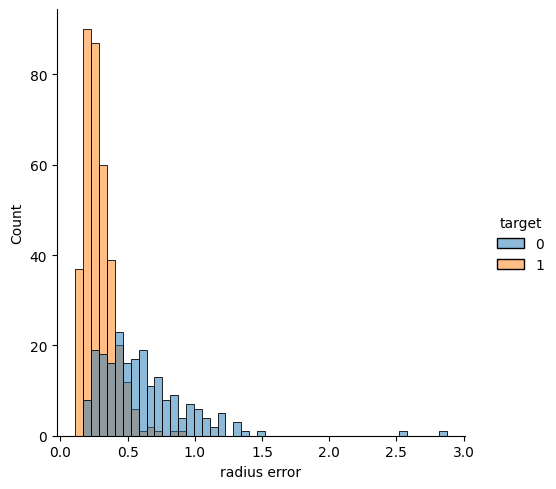

In [76]:
sns.displot(
    data=df_full.filter(regex='error|target'),
    x='radius error',
    hue='target',
)

<Axes: >

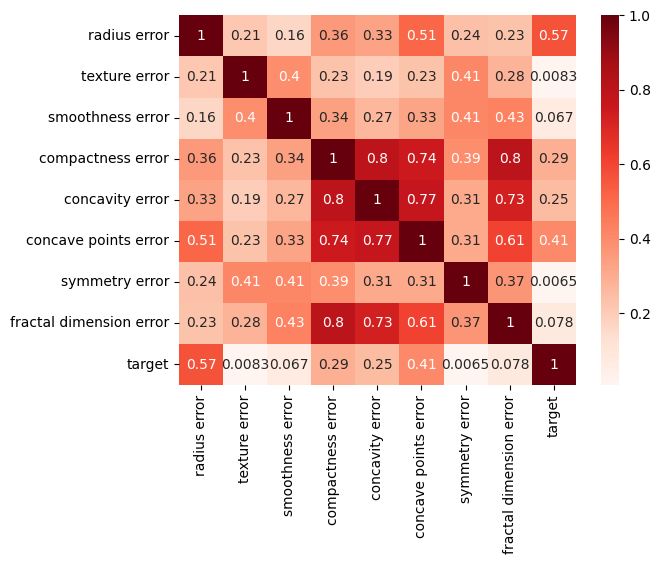

In [77]:
corr = abs(df_full.filter(regex='error|target').corr())
sns.heatmap(
    corr,
    annot=True,
    cmap='Reds',
)

<Axes: >

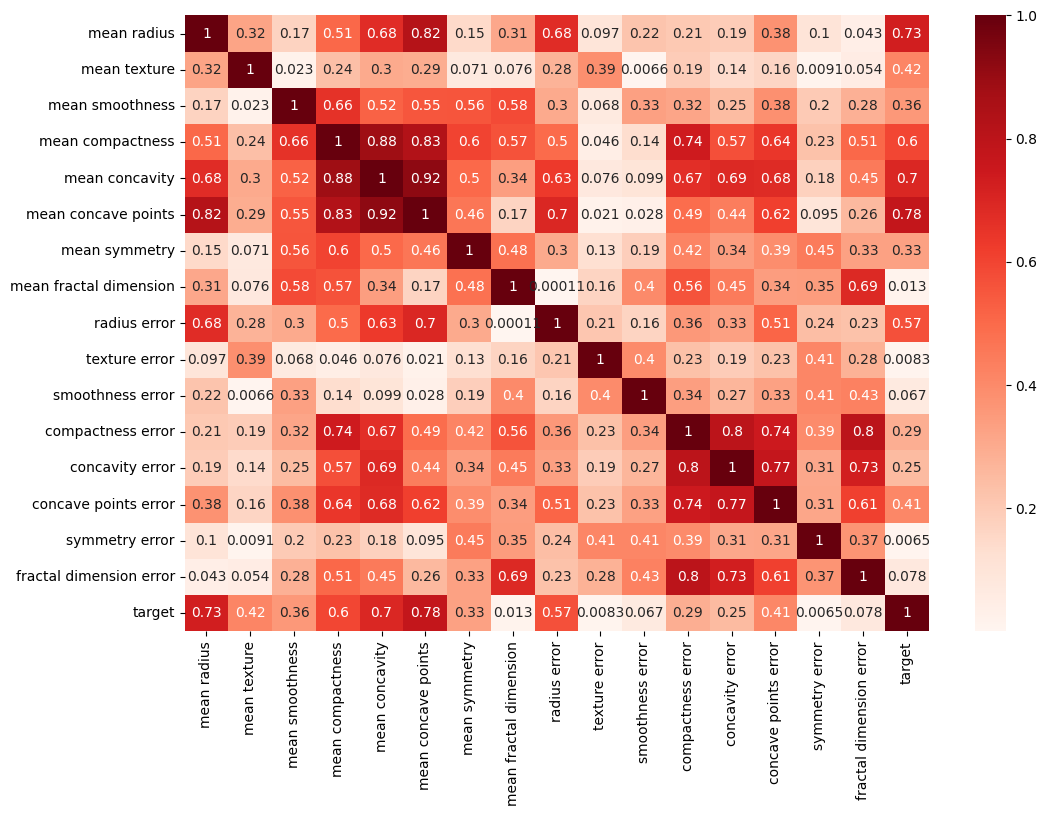

In [80]:
plt.figure(figsize=(12, 8))
corr = abs(df_full.filter(regex='mean|error|target').corr())
sns.heatmap(
    corr,
    annot=True,
    cmap='Reds',
)

<Axes: >

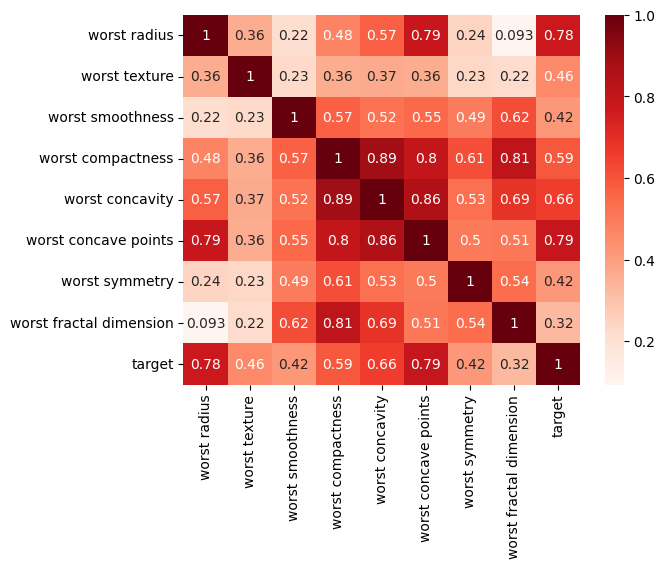

In [81]:
corr = abs(df_full.filter(regex='worst|target').corr())
sns.heatmap(
    corr,
    annot=True,
    cmap='Reds',
)

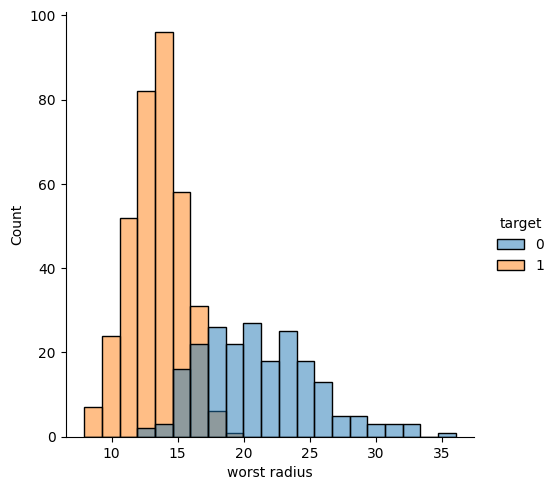

In [84]:
sns.displot(
    data=df_full.filter(regex='worst|target'),
    x='worst radius',
    hue='target',
)

In [107]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

df = df_full.filter(regex='mean|worst|target')
X_train, X_test, y_train, y_test = train_test_split(df.drop(columns=['target']), df.target, test_size=0.2, random_state=42)
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.2, random_state=42)

print(f'Number of features: {X_train.shape[1]}')

model = LogisticRegression()
model.fit(X_train, y_train)

y_pred = model.predict(X_val)

accuracy_score(y_val, y_pred)

Number of features: 16


0.9560439560439561

              precision    recall  f1-score   support

           0       0.98      0.93      0.95        43
           1       0.96      0.99      0.97        71

    accuracy                           0.96       114
   macro avg       0.97      0.96      0.96       114
weighted avg       0.97      0.96      0.96       114



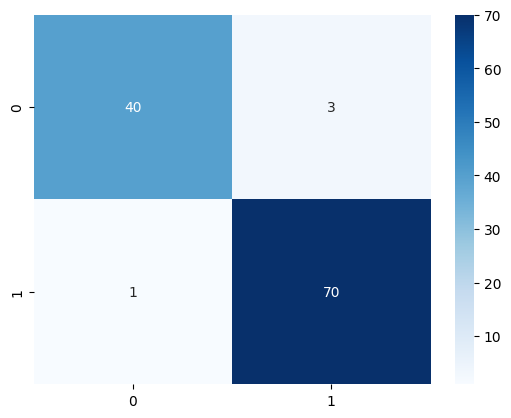

In [108]:
from sklearn.metrics import confusion_matrix


y_pred = model.predict(X_test)
sns.heatmap(
    confusion_matrix(y_test, y_pred),
    annot=True,
    cmap='Blues',
)

from sklearn.metrics import classification_report

print(classification_report(y_test, y_pred))



In [106]:
s = y_pred == y_test

s[s == False]

73     False
90     False
39     False
462    False
196    False
255    False
9      False
238    False
Name: target, dtype: bool

In [109]:
s = y_pred == y_test

s[s == False]

73     False
39     False
255    False
238    False
Name: target, dtype: bool

In [110]:
df.iloc[90]

mean radius                14.62000
mean texture               24.02000
mean smoothness             0.08974
mean compactness            0.08606
mean concavity              0.03102
mean concave points         0.02957
mean symmetry               0.16850
mean fractal dimension      0.05866
worst radius               16.11000
worst texture              29.11000
worst smoothness            0.11150
worst compactness           0.17660
worst concavity             0.09189
worst concave points        0.06946
worst symmetry              0.25220
worst fractal dimension     0.07246
target                      1.00000
Name: 90, dtype: float64

In [117]:
df[df.target == 1].mean()

mean radius                12.146524
mean texture               17.914762
mean smoothness             0.092478
mean compactness            0.080085
mean concavity              0.046058
mean concave points         0.025717
mean symmetry               0.174186
mean fractal dimension      0.062867
worst radius               13.379801
worst texture              23.515070
worst smoothness            0.124959
worst compactness           0.182673
worst concavity             0.166238
worst concave points        0.074444
worst symmetry              0.270246
worst fractal dimension     0.079442
target                      1.000000
dtype: float64

In [118]:
df[df.target == 0].mean()

mean radius                17.462830
mean texture               21.604906
mean smoothness             0.102898
mean compactness            0.145188
mean concavity              0.160775
mean concave points         0.087990
mean symmetry               0.192909
mean fractal dimension      0.062680
worst radius               21.134811
worst texture              29.318208
worst smoothness            0.144845
worst compactness           0.374824
worst concavity             0.450606
worst concave points        0.182237
worst symmetry              0.323468
worst fractal dimension     0.091530
target                      0.000000
dtype: float64

In [115]:
df_full.iloc[90]

mean radius                14.620000
mean texture               24.020000
mean smoothness             0.089740
mean compactness            0.086060
mean concavity              0.031020
mean concave points         0.029570
mean symmetry               0.168500
mean fractal dimension      0.058660
radius error                0.372100
texture error               1.111000
smoothness error            0.004868
compactness error           0.018180
concavity error             0.011210
concave points error        0.008606
symmetry error              0.020850
fractal dimension error     0.002893
worst radius               16.110000
worst texture              29.110000
worst smoothness            0.111500
worst compactness           0.176600
worst concavity             0.091890
worst concave points        0.069460
worst symmetry              0.252200
worst fractal dimension     0.072460
target                      1.000000
Name: 90, dtype: float64

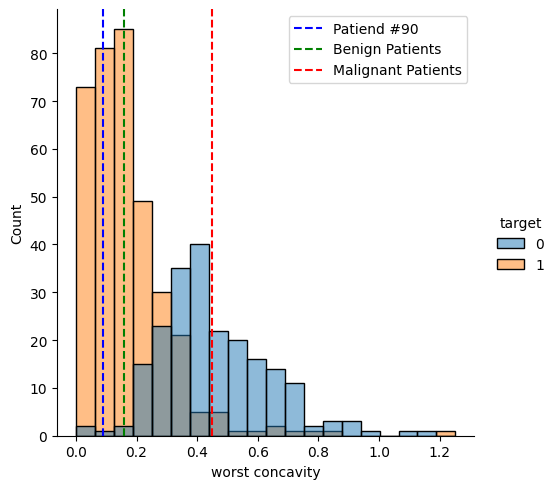

In [124]:
g = sns.displot(
    data=df,
    x='worst concavity',
    hue='target',
)

g.figure.axes[0].axvline(0.09, ls='--', color='blue', label='Patiend #90')
g.figure.axes[0].axvline(0.16, ls='--', color='green', label='Benign Patients')
g.figure.axes[0].axvline(0.45, ls='--', color='red', label='Malignant Patients')
plt.legend()